In [1]:
import os
import cmdstanpy
from cmdstanpy import CmdStanModel
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import describe, gaussian_kde, norm
import multiprocessing
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 14

In [3]:
from thinning import sample_hawkes_process_thinning_true_vectorised
from utils import exp_kernel_vectorised, constant_background, plot_counting_process
from mle import log_likelihood

In [4]:
np.random.SeedSequence()

SeedSequence(
    entropy=32669427184387658308544463185701260810,
)

In [5]:
max_T = 100
num_samples = 10
hawkes_realisations = []

master_seed = 240918493712496904598658578838980943694
seed_seq_master = np.random.SeedSequence(master_seed)

for i in range(num_samples):

    child_seed = seed_seq_master.spawn(1)[0]

    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised, seed=child_seed)
    hawkes_realisations.append(hawkes_realisation)

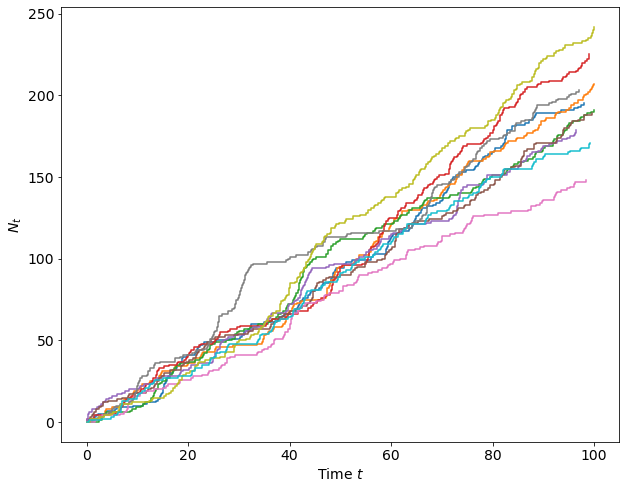

In [6]:
for h in hawkes_realisations:
    h = [0] + h
    counts = np.arange(len(h))
    plt.step(h, counts, where='post')
plt.xlabel("Time $t$")
plt.ylabel("$N_t$")
plt.show()

In [9]:
data_list = [{
    "N" : len(h),
    "events_list" : h,
    "max_T" : max_T
} for h in hawkes_realisations]

## Improper uniform prior

In [7]:
stan_file = os.path.join('.', 'bayesian', 'uninformative_priors.stan')
model_compiled = CmdStanModel(stan_file=stan_file,
                                # If you want multi-thread option, need to recompile
                                cpp_options={'STAN_THREADS': 'TRUE'},
                                # turn off below to avoid recompiling
                                # force_compile=True
                                )

13:25:05 - cmdstanpy - INFO - compiling stan file C:\Users\ethan\ONEDRI~1\Maths\YEAR4~1\Project\HAWKES~1\bayesian\uninformative_priors.stan to exe file C:\Users\ethan\OneDrive - University of Bristol\Maths\Year 4\Project\hawkes_project\bayesian\uninformative_priors.exe
13:25:48 - cmdstanpy - INFO - compiled model executable: C:\Users\ethan\OneDrive - University of Bristol\Maths\Year 4\Project\hawkes_project\bayesian\uninformative_priors.exe


In [8]:
model_compiled.exe_info()

{'stan_version_major': '2',
 'stan_version_minor': '34',
 'stan_version_patch': '1',
 'STAN_THREADS': 'true',
 'STAN_MPI': 'false',
 'STAN_OPENCL': 'false',
 'STAN_NO_RANGE_CHECKS': 'false',
 'STAN_CPP_OPTIMS': 'false'}

In [10]:
warmup=250

In [11]:
master_seed_stan = 32669427184387658308544463185701260810
seed_seq_master_stan = np.random.SeedSequence(master_seed_stan, pool_size=4)

fits = []

for i in range(num_samples):

    child_seed_stan = seed_seq_master_stan.spawn(1)[0]

    # Create a random number generator using the seed
    rng = np.random.default_rng(child_seed_stan)
    
    # Generate random integers less than 2**32 - 1
    child_seed = rng.integers(2**32 - 1)
    print(child_seed)

    fit = model_compiled.sample(data=data_list[i],
                                seed=child_seed,
                                chains=2,
                                parallel_chains=2,
                                iter_warmup=warmup,
                                iter_sampling=3*warmup,
                                save_warmup=True)
    fits.append(fit)

13:28:20 - cmdstanpy - INFO - CmdStan start processing


2018216597


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

13:29:10 - cmdstanpy - INFO - CmdStan done processing.
13:29:11 - cmdstanpy - INFO - CmdStan start processing



476519551


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

13:31:22 - cmdstanpy - INFO - CmdStan done processing.
13:31:22 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 709 divergent transitions (94.5%)
	Chain 2 had 653 divergent transitions (87.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
13:31:22 - cmdstanpy - INFO - CmdStan start processing



4176342247


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

13:33:04 - cmdstanpy - INFO - CmdStan done processing.
13:33:04 - cmdstanpy - INFO - CmdStan start processing



3000352509


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

13:35:47 - cmdstanpy - INFO - CmdStan done processing.
13:35:47 - cmdstanpy - INFO - CmdStan start processing



1729201535


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

13:36:51 - cmdstanpy - INFO - CmdStan done processing.
13:36:52 - cmdstanpy - INFO - CmdStan start processing



651799759


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

13:38:23 - cmdstanpy - INFO - CmdStan done processing.
13:38:23 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 395 divergent transitions (52.7%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
13:38:23 - cmdstanpy - INFO - CmdStan start processing



3057755919


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

13:39:36 - cmdstanpy - INFO - CmdStan done processing.
13:39:36 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 712 divergent transitions (94.9%)
	Chain 2 had 487 divergent transitions (64.9%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
13:39:36 - cmdstanpy - INFO - CmdStan start processing



2438372345


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

13:41:29 - cmdstanpy - INFO - CmdStan done processing.
13:41:29 - cmdstanpy - INFO - CmdStan start processing



3990836572


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

13:45:10 - cmdstanpy - INFO - CmdStan done processing.
13:45:10 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 718 divergent transitions (95.7%)
	Chain 2 had 532 divergent transitions (70.9%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
13:45:10 - cmdstanpy - INFO - CmdStan start processing



1737706346


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

13:46:43 - cmdstanpy - INFO - CmdStan done processing.
13:46:43 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 703 divergent transitions (93.7%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


In [12]:
def trace_plots(fits, params, warmup=None, chains=2):
    n = len(fits)
    m = len(params)
    fig, axs = plt.subplots(nrows=n, ncols=m, figsize=(5*m, 3*n))
    for i in range(n):
        df = fits[i].draws_pd(inc_warmup=(warmup is not None))
        for j in range(m):
            for k in range(1, chains+1):
                axs[i, j].plot(df[df['chain__']==k][params[j]].values, label=k)
            if warmup:
                axs[i, j].axvspan(xmin=0, xmax=warmup, color='gray', alpha=0.3, label='warmup')
            #axs[i, j].legend()
            if i==0:
                axs[i, j].set_title(params[j])


    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.01), ncol=chains+1)
    
    plt.tight_layout()
    plt.show()

In [13]:
param_strings = ['mu', 'alpha', 'delta']

C:\Users\ethan\anaconda3\envs\test\Lib\site-packages\matplotlib\axes\_base.py:2923: RuntimeWarning: overflow encountered in scalar add
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


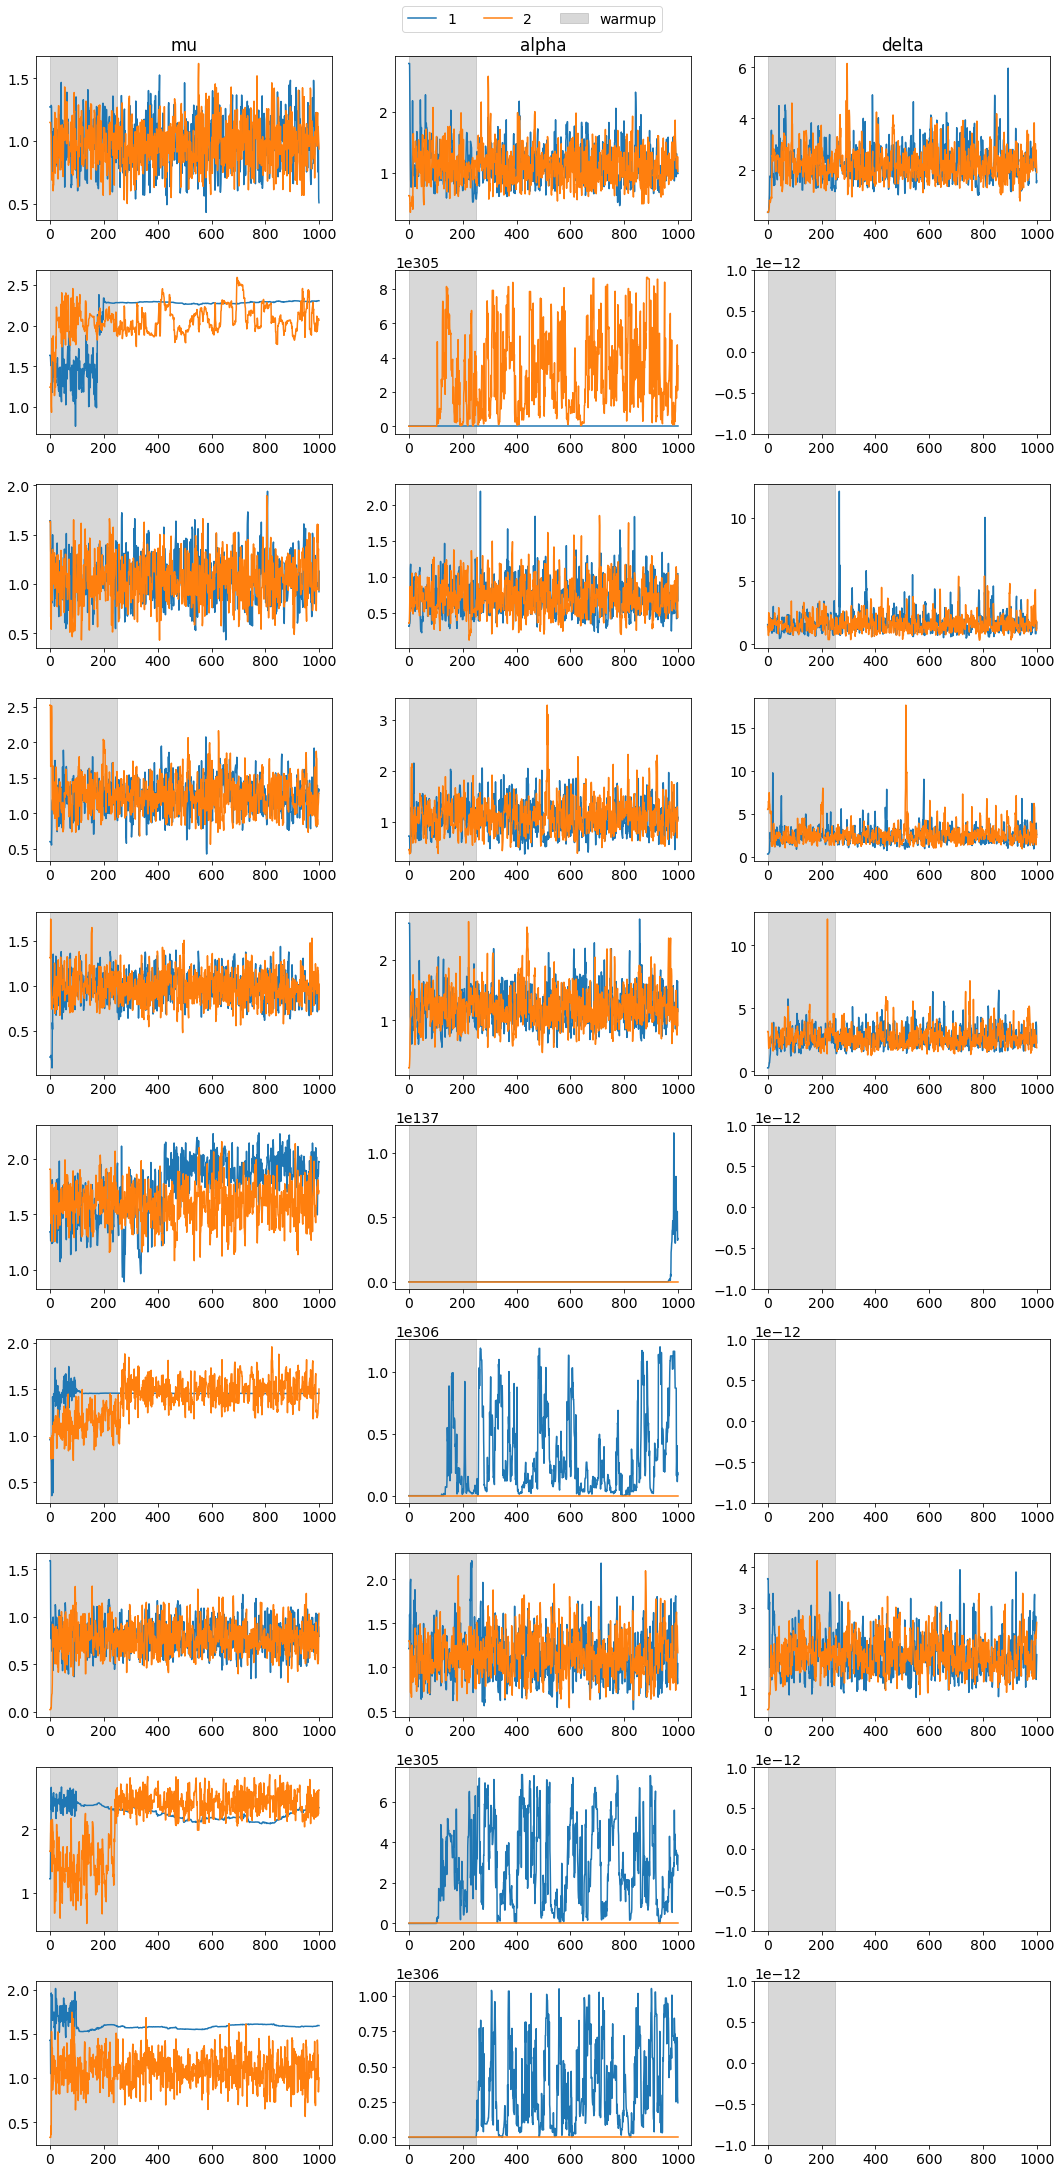

In [14]:
trace_plots(fits, param_strings, warmup=warmup)

In [26]:
print(fits[-1].diagnose())

Processing csv files: C:\Users\ethan\AppData\Local\Temp\tmpsjjogffj\uninformative_priors0q5j3k10\uninformative_priors-20240421134510_1.csvWarning: non-fatal error reading adaptation data
, C:\Users\ethan\AppData\Local\Temp\tmpsjjogffj\uninformative_priors0q5j3k10\uninformative_priors-20240421134510_2.csvWarning: non-fatal error reading adaptation data


Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
703 of 2000 (35.15%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.00, is below the nominal threshold of 0.30 which suggests that HMC may have trouble exploring the target distribution.
If possible, try to reparameterize the model.

Let to a lot of errors and lack of convergence...

## Super-vague but proper prior

### Using Exponential

In [28]:
stan_file = os.path.join('.', 'bayesian', 'uninformative_priors_proper.stan')
model_compiled = CmdStanModel(stan_file=stan_file,
                                # If you want multi-thread option, need to recompile
                                cpp_options={'STAN_THREADS': 'TRUE'},
                                # turn off below to avoid recompiling
                                # force_compile=True
                                )

13:57:15 - cmdstanpy - INFO - compiling stan file C:\Users\ethan\ONEDRI~1\Maths\YEAR4~1\Project\HAWKES~1\bayesian\uninformative_priors_proper.stan to exe file C:\Users\ethan\OneDrive - University of Bristol\Maths\Year 4\Project\hawkes_project\bayesian\uninformative_priors_proper.exe
13:57:32 - cmdstanpy - INFO - compiled model executable: C:\Users\ethan\OneDrive - University of Bristol\Maths\Year 4\Project\hawkes_project\bayesian\uninformative_priors_proper.exe


In [29]:
model_compiled.exe_info()

{'stan_version_major': '2',
 'stan_version_minor': '34',
 'stan_version_patch': '1',
 'STAN_THREADS': 'true',
 'STAN_MPI': 'false',
 'STAN_OPENCL': 'false',
 'STAN_NO_RANGE_CHECKS': 'false',
 'STAN_CPP_OPTIMS': 'false'}

In [30]:
warmup=250

In [31]:
master_seed_stan = 32669427184387658308544463185701260810
seed_seq_master_stan = np.random.SeedSequence(master_seed_stan, pool_size=4)

fits = []

for i in range(num_samples):

    child_seed_stan = seed_seq_master_stan.spawn(1)[0]

    # Create a random number generator using the seed
    rng = np.random.default_rng(child_seed_stan)
    
    # Generate random integers less than 2**32 - 1
    child_seed = rng.integers(2**32 - 1)
    print(child_seed)

    fit = model_compiled.sample(data=data_list[i],
                                seed=child_seed,
                                chains=2,
                                parallel_chains=2,
                                iter_warmup=warmup,
                                iter_sampling=3*warmup,
                                save_warmup=True)
    fits.append(fit)

13:58:18 - cmdstanpy - INFO - CmdStan start processing


2018216597


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

13:59:23 - cmdstanpy - INFO - CmdStan done processing.
13:59:23 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: exponential_lpdf: Random variable is -0.934703, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -1.9716, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -0.113329, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -46.0188, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -42.814, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -45.6981, but must be nonnegative! (in 'uninformati


476519551


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:00:04 - cmdstanpy - INFO - CmdStan done processing.
14:00:04 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: exponential_lpdf: Random variable is -1.23914, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -14.5805, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -13.2325, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -3.06155, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -94.9724, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -3.96479, but must be nonnegative! (in 'uninformati


4176342247


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:00:39 - cmdstanpy - INFO - CmdStan done processing.
14:00:39 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: exponential_lpdf: Random variable is -1.12668, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -1.5148, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -1.53843, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -1.6862, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -207.329, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -868.282, but must be nonnegative! (in 'uninformative


3000352509


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:01:55 - cmdstanpy - INFO - CmdStan done processing.
14:01:56 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: exponential_lpdf: Random variable is -1.5501, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -39.2813, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -40.6761, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -9.51148, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -1.66427, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -1953.34, but must be nonnegative! (in 'uninformativ


1729201535


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:03:07 - cmdstanpy - INFO - CmdStan done processing.
14:03:07 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: exponential_lpdf: Random variable is -1.3421, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -1.44349, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -1.82096, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -47.059, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -45.33, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -11.5222, but must be nonnegative! (in 'uninformative_p


651799759


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:04:54 - cmdstanpy - INFO - CmdStan done processing.
14:04:54 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: exponential_lpdf: Random variable is -2041.64, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -56.0557, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -1.2682, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -0.041247, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
Consider re-running with show_console=True if the above output is unclear!
14:04:54 - cmdstanpy - INFO - CmdStan start processing



3057755919


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:05:53 - cmdstanpy - INFO - CmdStan done processing.
14:05:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: exponential_lpdf: Random variable is -0.072524, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -1.64175, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -43.1085, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -20.7972, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -43.224, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -21.8116, but must be nonnegative! (in 'uninformati


2438372345


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:07:54 - cmdstanpy - INFO - CmdStan done processing.
14:07:54 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: exponential_lpdf: Random variable is -0.301198, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -13.3871, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -11.1033, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -3.35886, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -0.600679, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -0.166449, but must be nonnegative! (in 'uninform


3990836572


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:12:58 - cmdstanpy - INFO - CmdStan done processing.
14:12:58 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: exponential_lpdf: Random variable is -1.38148, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -0.696982, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -20.3941, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -18.6046, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -5.00805, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -0.493674, but must be nonnegative! (in 'uninforma


1737706346


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:14:02 - cmdstanpy - INFO - CmdStan done processing.
14:14:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: exponential_lpdf: Random variable is -0.193757, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -0.545475, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -257.053, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -3.8306, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -1.6862, but must be nonnegative! (in 'uninformative_priors_proper.stan', line 59, column 4 to column 29)
	Exception: exponential_lpdf: Random variable is -0.969581, but must be nonnegative! (in 'uninformat

In [44]:
for i in range(num_samples):
    print(fits[i].summary())
    print(fits[i].diagnose())

                            Mean      MCSE  ...  N_Eff/s     R_hat
lp__                  -43.101400  0.058634  ...  3.74503  1.001560
mu                      0.972638  0.005984  ...  6.88793  0.998952
alpha                   1.125690  0.012185  ...  4.83362  1.003250
delta                   2.248080  0.025118  ...  5.14779  1.001460
hawkes_log_likelihood -43.917400  0.062272  ...  3.74940  1.001960

[5 rows x 9 columns]
Processing csv files: C:\Users\ethan\AppData\Local\Temp\tmpsjjogffj\uninformative_priors_proper4rai96fe\uninformative_priors_proper-20240421135818_1.csvWarning: non-fatal error reading adaptation data
, C:\Users\ethan\AppData\Local\Temp\tmpsjjogffj\uninformative_priors_proper4rai96fe\uninformative_priors_proper-20240421135818_2.csvWarning: non-fatal error reading adaptation data


Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler tr

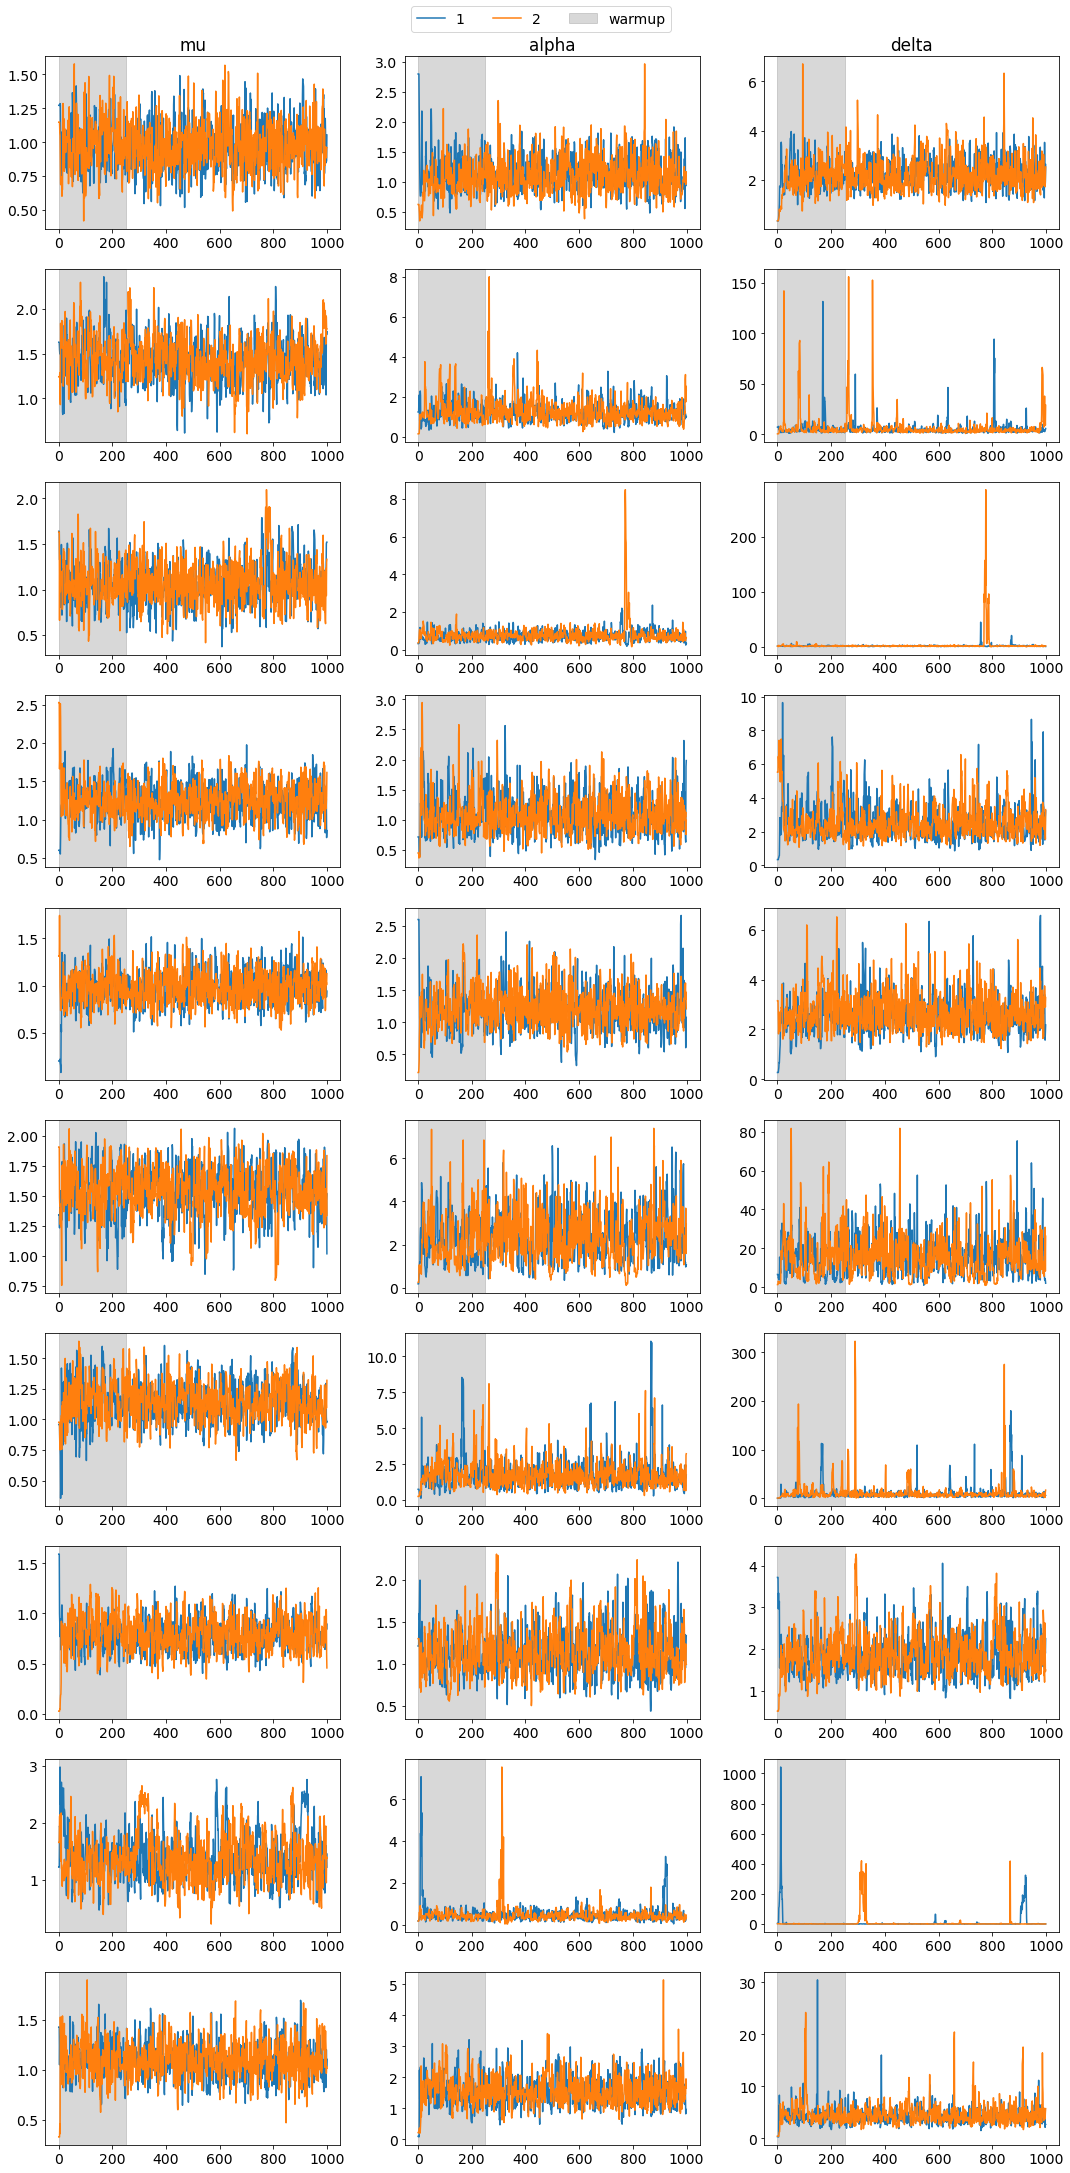

In [32]:
trace_plots(fits, param_strings, warmup=warmup)

In [53]:
def posterior_histograms(fits, params, prior_functions=None):
    n = len(fits)
    m = len(params)
    fig, axs = plt.subplots(nrows=n, ncols=m, figsize=(5*m, 3*n))
    max_x = np.zeros(m)
    max_y = np.zeros(m)
    
    # Plot histograms and KDE plots for posterior distributions
    for i in range(n):
        df = fits[i].draws_pd()
        for j in range(m):
            data = df[params[j]].values
            hist, bins, _ = axs[i, j].hist(data, density=True, alpha=0.5, bins=30, color='blue')  # Plot histogram
            
            # Suppress specific future warning
            with warnings.catch_warnings():
                warnings.simplefilter(action='ignore', category=FutureWarning)
                sns.kdeplot(data, color='blue', ax=axs[i, j], label='Posterior KDE')  # Overlay KDE plot on histogram

            credible_interval = stats.mstats.mquantiles(data, [0.025, 0.975])
            axs[i, j].axvspan(xmin=credible_interval[0], xmax=credible_interval[1], color='green', alpha=0.2, label='95% CI')

            max_x[j] = max(max_x[j], max(data))
            max_y[j] = max(max_y[j], max(hist))
            
            if i == 0:
                axs[i, j].set_title(params[j])  # Set title for the first row of subplots

    max_x[2]=15
    # Set the same limits for all subplots
    for i in range(n):
        for j in range(m):
            axs[i, j].set_xlim(0, max_x[j])
            axs[i, j].set_ylim(0, max_y[j])


    # Optionally plot prior density functions
    if prior_functions is not None:
        for j, prior_func in enumerate(prior_functions):
            for i, ax_row in enumerate(axs):
                x_values = np.linspace(0, max_x[j], 1000)  # Generate x values for prior function evaluation
                prior_values = prior_func(x_values)  # Evaluate prior density function
                ax_row[j].plot(x_values, prior_values, color='red', linestyle='--', label='Prior')  # Overlay prior distribution
    
    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.01), ncol=m)
    
    plt.tight_layout()
    plt.show()

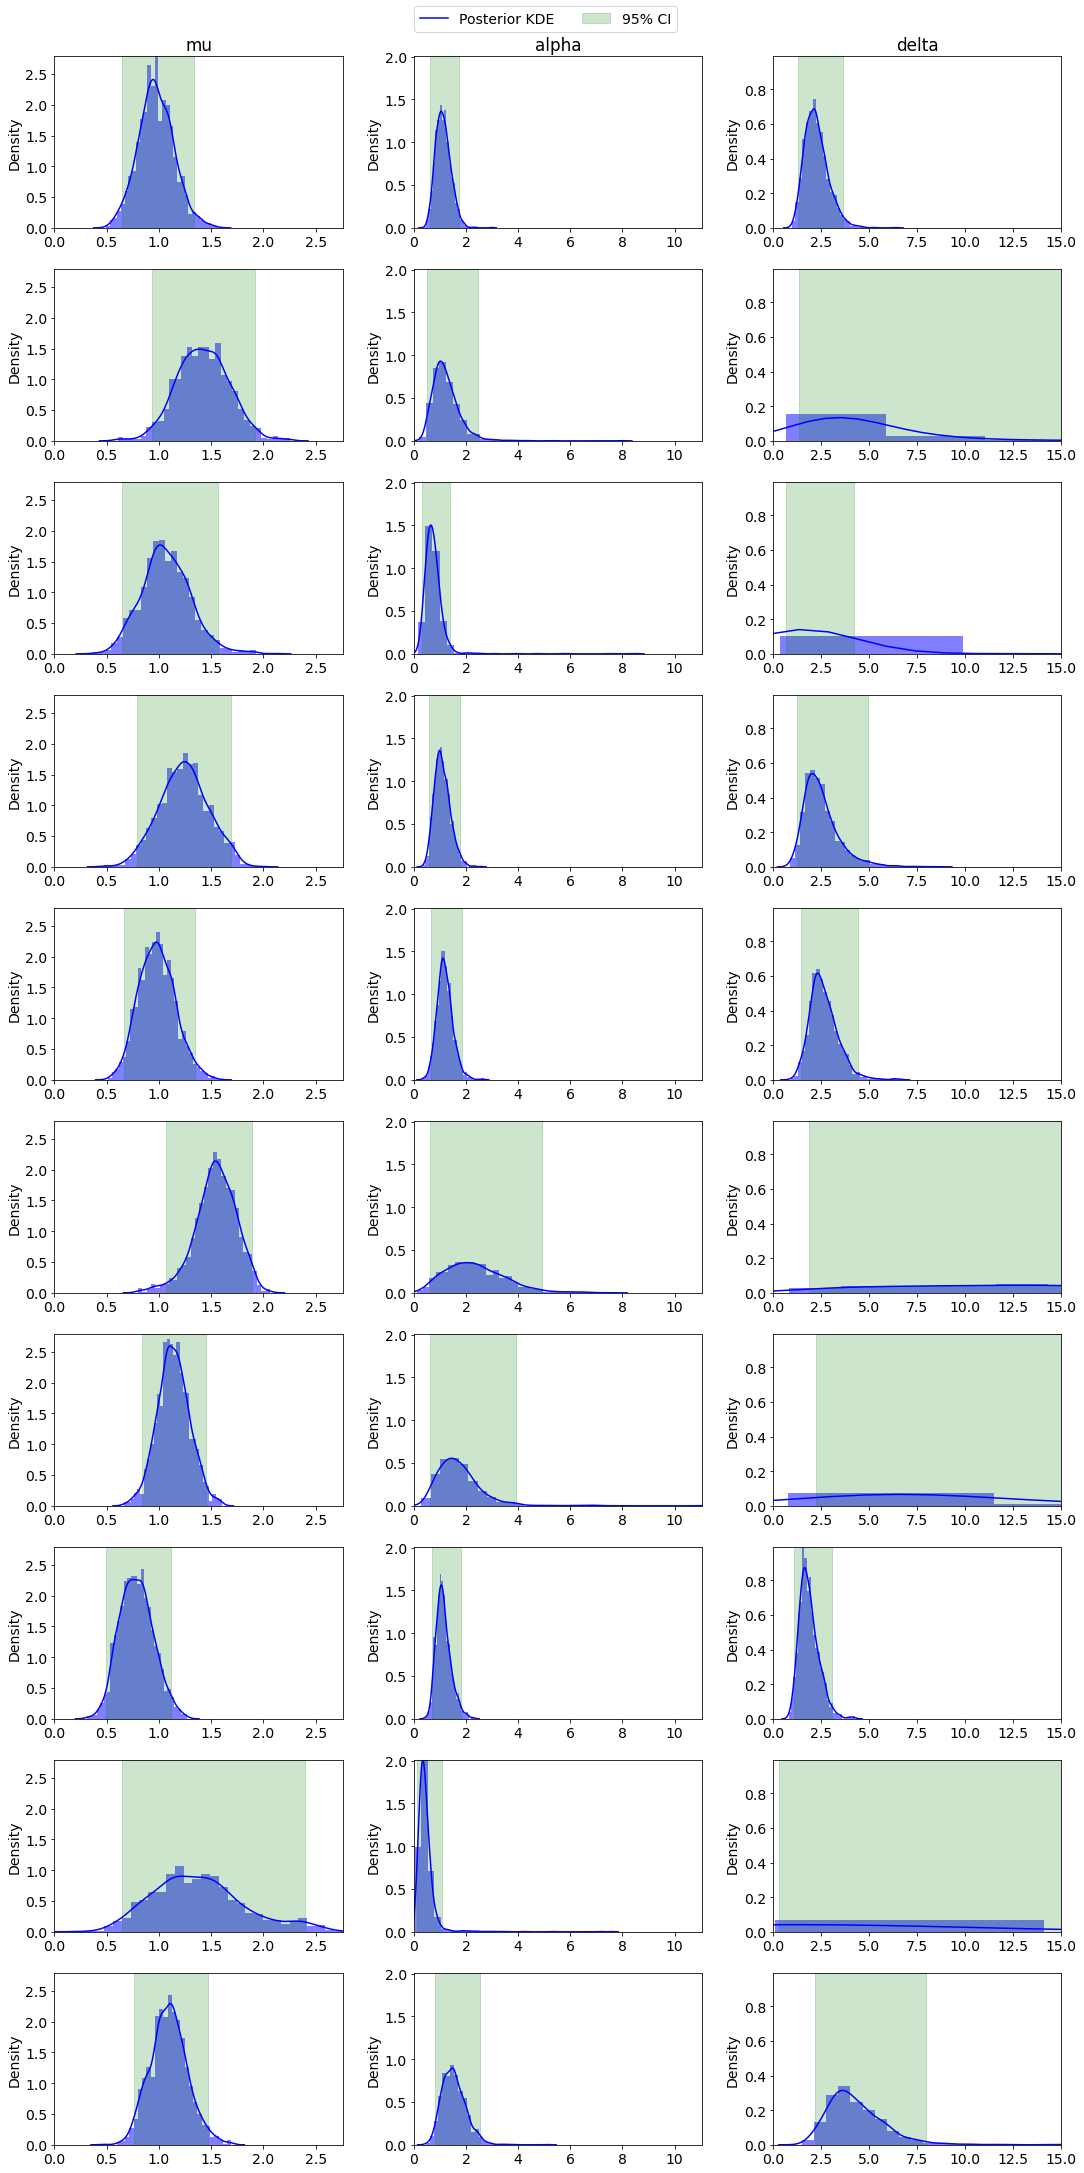

In [54]:
posterior_histograms(fits, param_strings)

In [47]:
def stacked_credible_intervals(fits, params, true_params, prior_cis=None):
    n = len(fits)
    m = len(params)
    fig, axs = plt.subplots(nrows=1, ncols=m, figsize=(6*m, 3))
    max_x = np.zeros(m)
    max_y = np.zeros(m)

    data = np.zeros((n, m, 1500))

    for i in range(n):
        df = fits[i].draws_pd()
        for j in range(m):
            data = df[params[j]].values

            mean = np.mean(data)

            

            credible_interval = stats.mstats.mquantiles(data, [0.025, 0.975])

            if credible_interval[0] <= true_params[j] <= credible_interval[1]:
                color_temp = 'green'
            else:
                color_temp = 'red'
            

            axs[j].scatter(mean, i, color=color_temp)
            axs[j].plot(credible_interval, [i, i], color=color_temp, linestyle='-', linewidth=2, marker='|')

    for j in range(m):

        if prior_cis:
            axs[j].plot(prior_cis[j], [n, n], color='blue', linestyle='-', linewidth=2, marker='|', label="Prior")

        
        axs[j].axvline(true_params[j], color='black', linestyle='--', label='True parameter value')
        axs[j].invert_yaxis()
        axs[j].set_title(params[j])  # Set title for the first row of subplots

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=m)
    
    plt.tight_layout()
    plt.show()

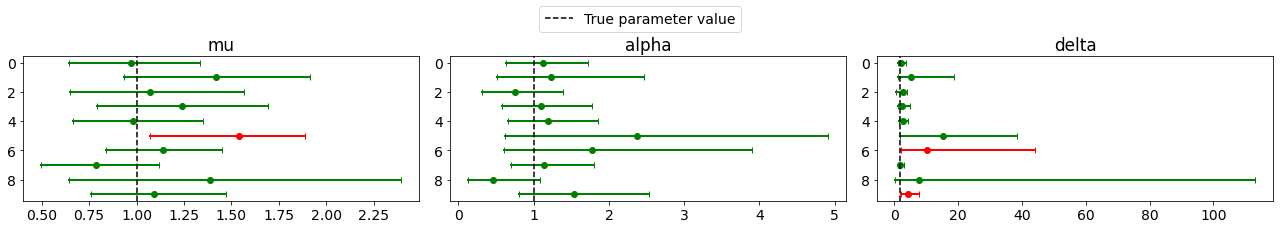

In [48]:
stacked_credible_intervals(fits, param_strings, [1,1,2])

See if constraining $\mu$ to be non-negative improves anything here (should have already had this).

In [55]:
stan_file = os.path.join('.', 'bayesian', 'uninformative_priors_proper_nonneg_mu.stan')
model_compiled = CmdStanModel(stan_file=stan_file,
                                # If you want multi-thread option, need to recompile
                                cpp_options={'STAN_THREADS': 'TRUE'},
                                # turn off below to avoid recompiling
                                # force_compile=True
                                )

14:42:47 - cmdstanpy - INFO - compiling stan file C:\Users\ethan\ONEDRI~1\Maths\YEAR4~1\Project\HAWKES~1\bayesian\uninformative_priors_proper_nonneg_mu.stan to exe file C:\Users\ethan\OneDrive - University of Bristol\Maths\Year 4\Project\hawkes_project\bayesian\uninformative_priors_proper_nonneg_mu.exe
14:43:07 - cmdstanpy - INFO - compiled model executable: C:\Users\ethan\OneDrive - University of Bristol\Maths\Year 4\Project\hawkes_project\bayesian\uninformative_priors_proper_nonneg_mu.exe


In [57]:
model_compiled.exe_info()

{'stan_version_major': '2',
 'stan_version_minor': '34',
 'stan_version_patch': '1',
 'STAN_THREADS': 'true',
 'STAN_MPI': 'false',
 'STAN_OPENCL': 'false',
 'STAN_NO_RANGE_CHECKS': 'false',
 'STAN_CPP_OPTIMS': 'false'}

In [58]:
master_seed_stan = 32669427184387658308544463185701260810
seed_seq_master_stan = np.random.SeedSequence(master_seed_stan, pool_size=4)

fits = []

for i in range(num_samples):

    child_seed_stan = seed_seq_master_stan.spawn(1)[0]

    # Create a random number generator using the seed
    rng = np.random.default_rng(child_seed_stan)
    
    # Generate random integers less than 2**32 - 1
    child_seed = rng.integers(2**32 - 1)
    print(child_seed)

    fit = model_compiled.sample(data=data_list[i],
                                seed=child_seed,
                                chains=2,
                                parallel_chains=2,
                                iter_warmup=warmup,
                                iter_sampling=3*warmup,
                                save_warmup=True)
    fits.append(fit)

14:44:25 - cmdstanpy - INFO - CmdStan start processing


2018216597


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:44:50 - cmdstanpy - INFO - CmdStan done processing.
14:44:50 - cmdstanpy - INFO - CmdStan start processing



476519551


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:45:31 - cmdstanpy - INFO - CmdStan done processing.
14:45:31 - cmdstanpy - INFO - CmdStan start processing



4176342247


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:46:02 - cmdstanpy - INFO - CmdStan done processing.
14:46:02 - cmdstanpy - INFO - CmdStan start processing



3000352509


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:46:46 - cmdstanpy - INFO - CmdStan done processing.
14:46:46 - cmdstanpy - INFO - CmdStan start processing



1729201535


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:47:08 - cmdstanpy - INFO - CmdStan done processing.
14:47:08 - cmdstanpy - INFO - CmdStan start processing



651799759


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:47:46 - cmdstanpy - INFO - CmdStan done processing.
14:47:46 - cmdstanpy - INFO - CmdStan start processing



3057755919


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:48:06 - cmdstanpy - INFO - CmdStan done processing.
14:48:07 - cmdstanpy - INFO - CmdStan start processing



2438372345


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:48:41 - cmdstanpy - INFO - CmdStan done processing.
14:48:41 - cmdstanpy - INFO - CmdStan start processing



3990836572


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:51:16 - cmdstanpy - INFO - CmdStan done processing.
14:51:16 - cmdstanpy - INFO - CmdStan start processing



1737706346


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:52:09 - cmdstanpy - INFO - CmdStan done processing.


In [59]:
for i in range(num_samples):
    print(fits[i].summary())
    print(fits[i].diagnose())

                            Mean      MCSE  ...  N_Eff/s     R_hat
lp__                  -43.236300  0.053663  ...  15.1242  1.003720
mu                      0.988661  0.006750  ...  21.8901  0.999535
alpha                   1.123950  0.011018  ...  19.8677  1.000310
delta                   2.291810  0.028470  ...  16.7721  0.999987
hawkes_log_likelihood -44.033200  0.056736  ...  16.4248  1.003450

[5 rows x 9 columns]
Processing csv files: C:\Users\ethan\AppData\Local\Temp\tmpsjjogffj\uninformative_priors_proper_nonneg_muynewgrh6\uninformative_priors_proper_nonneg_mu-20240421144425_1.csvWarning: non-fatal error reading adaptation data
, C:\Users\ethan\AppData\Local\Temp\tmpsjjogffj\uninformative_priors_proper_nonneg_muynewgrh6\uninformative_priors_proper_nonneg_mu-20240421144425_2.csvWarning: non-fatal error reading adaptation data


Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transiti

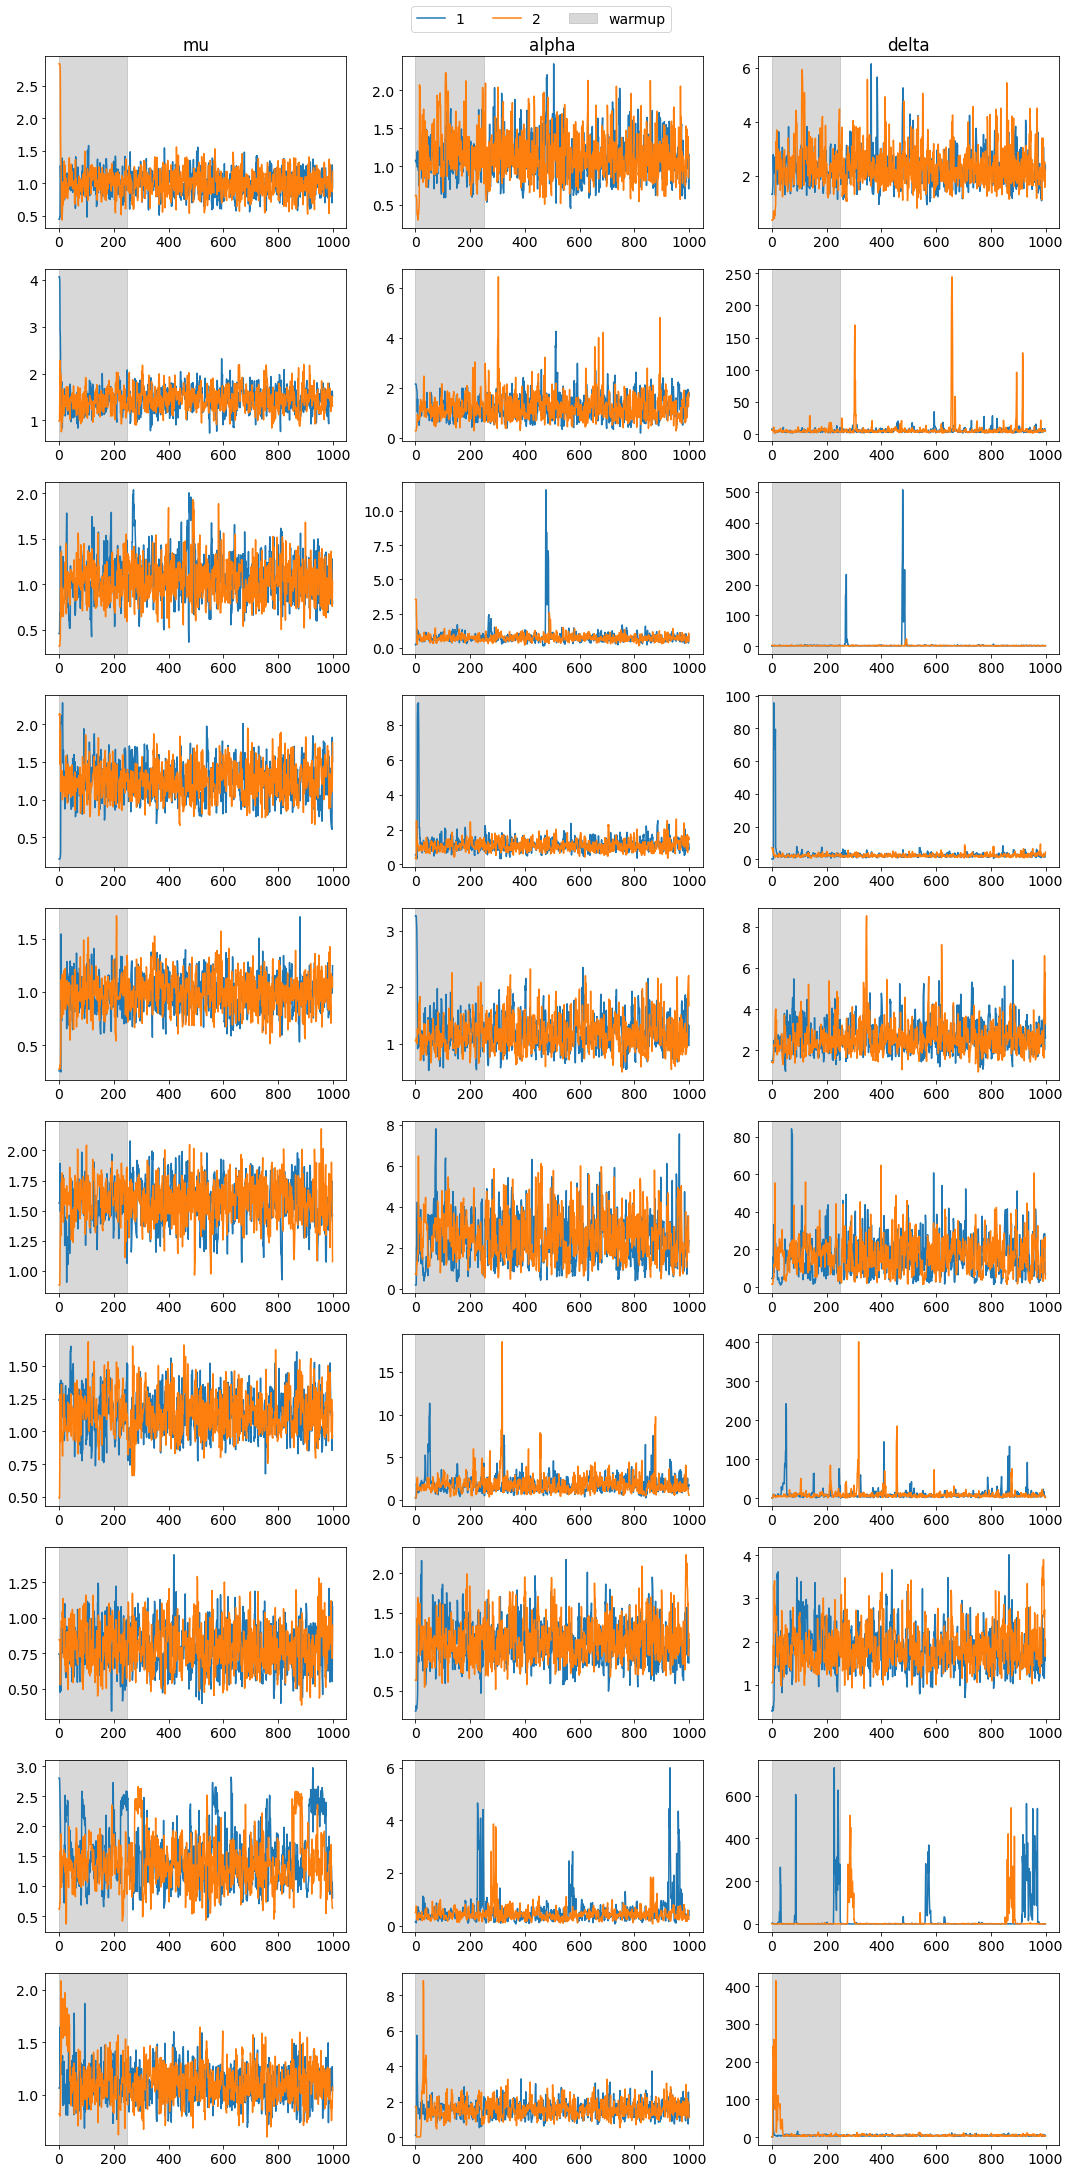

In [60]:
trace_plots(fits, param_strings, warmup=warmup)

In [61]:
def posterior_histograms(fits, params, prior_functions=None):
    n = len(fits)
    m = len(params)
    fig, axs = plt.subplots(nrows=n, ncols=m, figsize=(5*m, 3*n))
    max_x = np.zeros(m)
    max_y = np.zeros(m)
    
    # Plot histograms and KDE plots for posterior distributions
    for i in range(n):
        df = fits[i].draws_pd()
        for j in range(m):
            data = df[params[j]].values
            hist, bins, _ = axs[i, j].hist(data, density=True, alpha=0.5, bins=30, color='blue')  # Plot histogram
            
            # Suppress specific future warning
            with warnings.catch_warnings():
                warnings.simplefilter(action='ignore', category=FutureWarning)
                sns.kdeplot(data, color='blue', ax=axs[i, j], label='Posterior KDE')  # Overlay KDE plot on histogram

            credible_interval = stats.mstats.mquantiles(data, [0.025, 0.975])
            axs[i, j].axvspan(xmin=credible_interval[0], xmax=credible_interval[1], color='green', alpha=0.2, label='95% CI')

            max_x[j] = max(max_x[j], max(data))
            max_y[j] = max(max_y[j], max(hist))
            
            if i == 0:
                axs[i, j].set_title(params[j])  # Set title for the first row of subplots

    max_x[2]=15
    # Set the same limits for all subplots
    for i in range(n):
        for j in range(m):
            axs[i, j].set_xlim(0, max_x[j])
            axs[i, j].set_ylim(0, max_y[j])


    # Optionally plot prior density functions
    if prior_functions is not None:
        for j, prior_func in enumerate(prior_functions):
            for i, ax_row in enumerate(axs):
                x_values = np.linspace(0, max_x[j], 1000)  # Generate x values for prior function evaluation
                prior_values = prior_func(x_values)  # Evaluate prior density function
                ax_row[j].plot(x_values, prior_values, color='red', linestyle='--', label='Prior')  # Overlay prior distribution
    
    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.01), ncol=m)
    
    plt.tight_layout()
    plt.show()

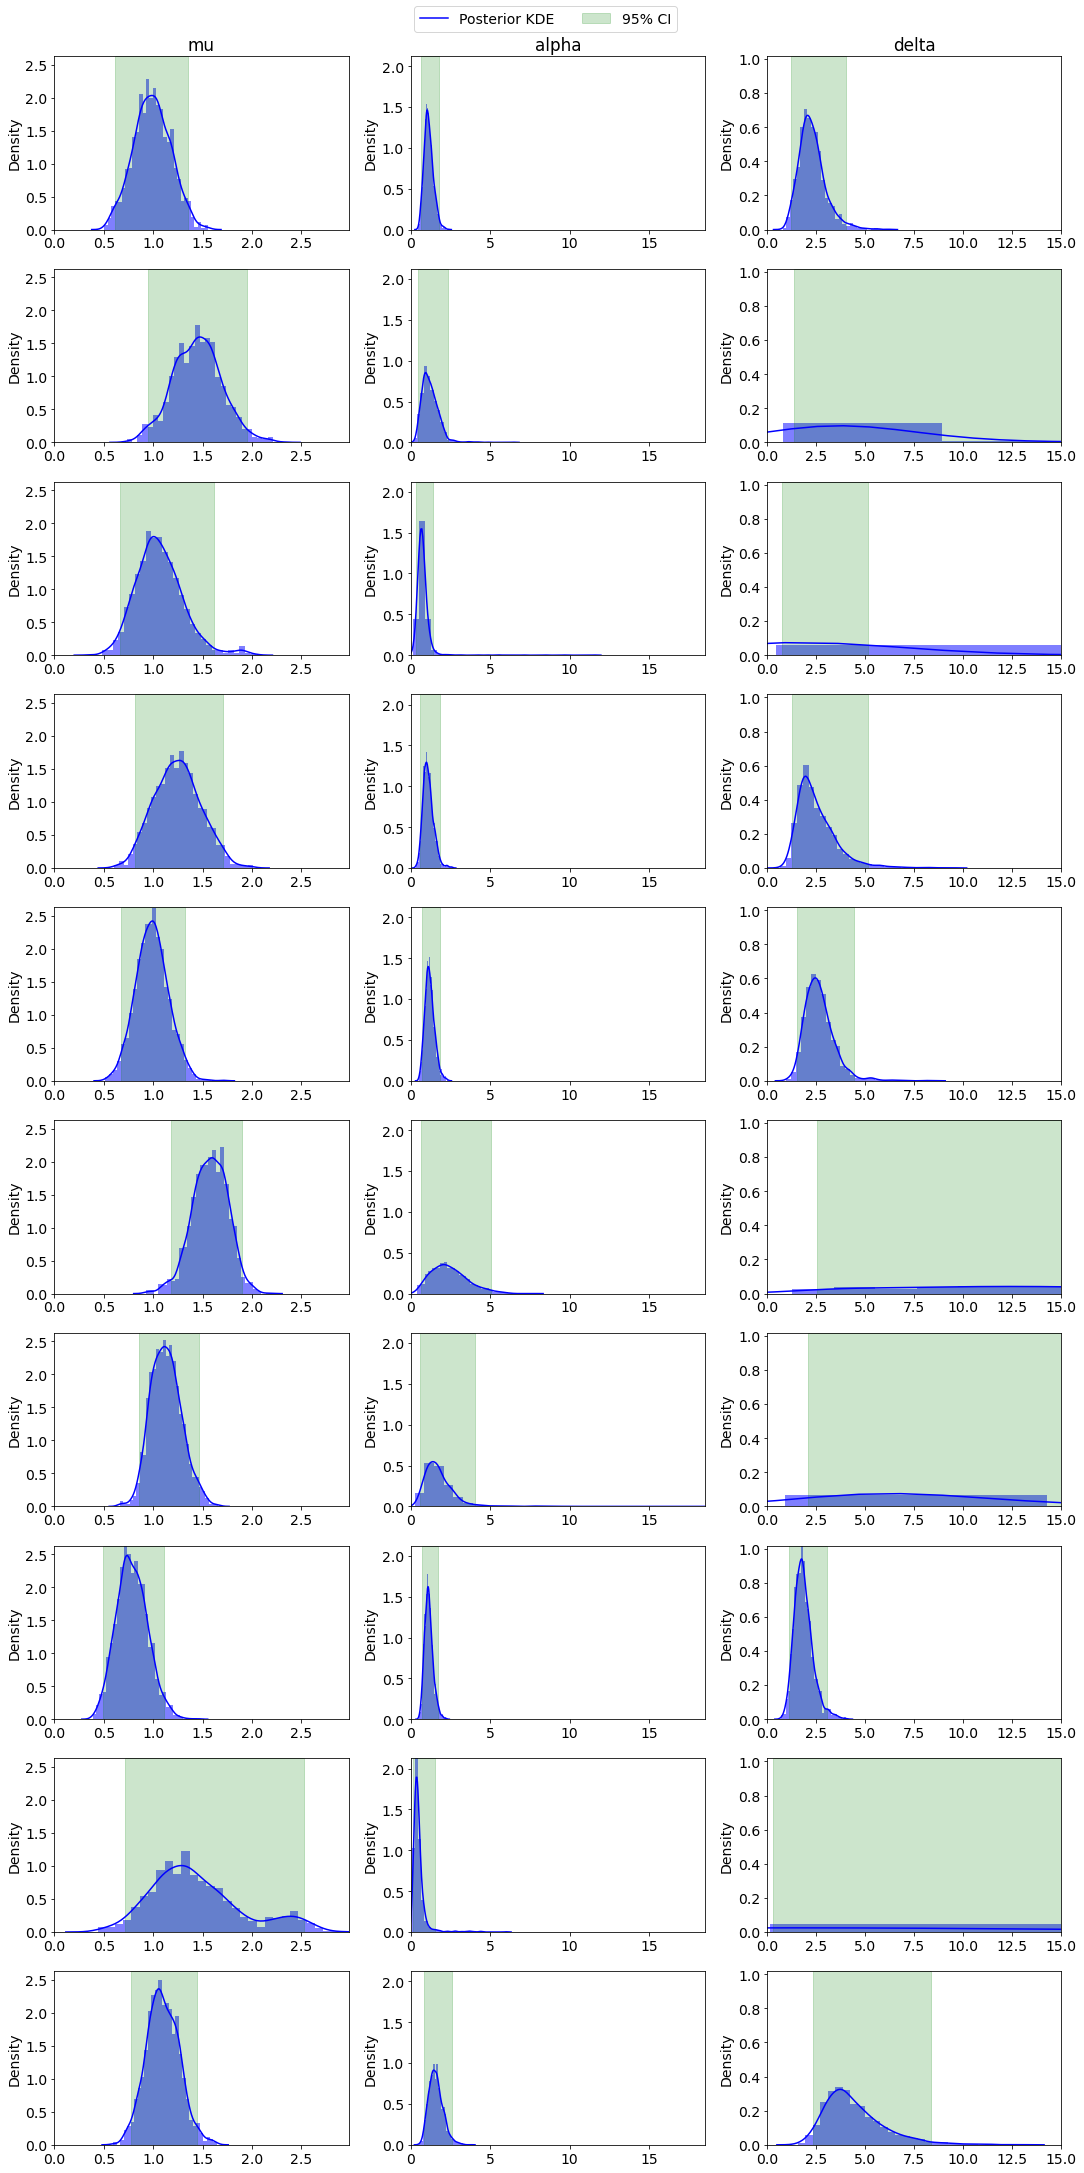

In [62]:
posterior_histograms(fits, param_strings)

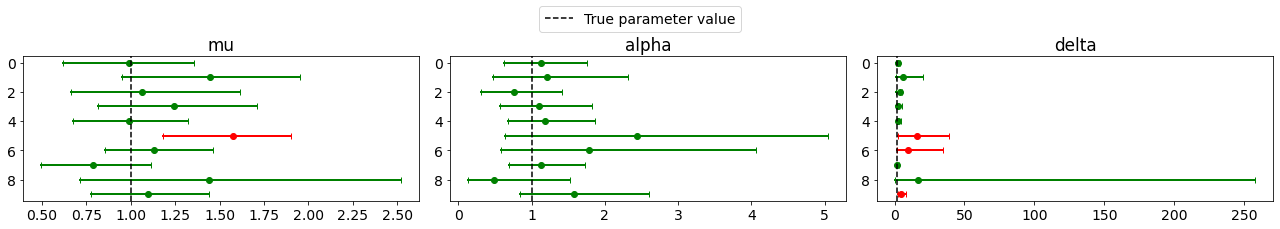

In [63]:
stacked_credible_intervals(fits, param_strings, [1,1,2])

### Using Uniform

In [66]:
stan_file = os.path.join('.', 'bayesian', 'uninformative_priors_proper_2.stan')
model_compiled = CmdStanModel(stan_file=stan_file,
                                # If you want multi-thread option, need to recompile
                                cpp_options={'STAN_THREADS': 'TRUE'},
                                # turn off below to avoid recompiling
                                # force_compile=True
                                )

15:04:39 - cmdstanpy - INFO - compiling stan file C:\Users\ethan\ONEDRI~1\Maths\YEAR4~1\Project\HAWKES~1\bayesian\uninformative_priors_proper_2.stan to exe file C:\Users\ethan\OneDrive - University of Bristol\Maths\Year 4\Project\hawkes_project\bayesian\uninformative_priors_proper_2.exe
15:04:59 - cmdstanpy - INFO - compiled model executable: C:\Users\ethan\OneDrive - University of Bristol\Maths\Year 4\Project\hawkes_project\bayesian\uninformative_priors_proper_2.exe


In [67]:
model_compiled.exe_info()

{'stan_version_major': '2',
 'stan_version_minor': '34',
 'stan_version_patch': '1',
 'STAN_THREADS': 'true',
 'STAN_MPI': 'false',
 'STAN_OPENCL': 'false',
 'STAN_NO_RANGE_CHECKS': 'false',
 'STAN_CPP_OPTIMS': 'false'}

In [68]:
master_seed_stan = 32669427184387658308544463185701260810
seed_seq_master_stan = np.random.SeedSequence(master_seed_stan, pool_size=4)

fits = []

for i in range(num_samples):

    child_seed_stan = seed_seq_master_stan.spawn(1)[0]

    # Create a random number generator using the seed
    rng = np.random.default_rng(child_seed_stan)
    
    # Generate random integers less than 2**32 - 1
    child_seed = rng.integers(2**32 - 1)
    print(child_seed)

    fit = model_compiled.sample(data=data_list[i],
                                seed=child_seed,
                                chains=2,
                                parallel_chains=2,
                                iter_warmup=warmup,
                                iter_sampling=3*warmup,
                                save_warmup=True)
    fits.append(fit)

15:05:06 - cmdstanpy - INFO - CmdStan start processing


2018216597


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

15:06:58 - cmdstanpy - INFO - CmdStan done processing.
15:06:58 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 609 divergent transitions (81.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:06:58 - cmdstanpy - INFO - CmdStan start processing



476519551


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

15:08:27 - cmdstanpy - INFO - CmdStan done processing.
15:08:27 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 513 divergent transitions (68.4%)
	Chain 2 had 720 divergent transitions (96.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:08:27 - cmdstanpy - INFO - CmdStan start processing



4176342247


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

15:08:59 - cmdstanpy - INFO - CmdStan done processing.
15:08:59 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 358 divergent transitions (47.7%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:08:59 - cmdstanpy - INFO - CmdStan start processing



3000352509


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

15:12:06 - cmdstanpy - INFO - CmdStan done processing.
15:12:06 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 551 divergent transitions (73.5%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:12:06 - cmdstanpy - INFO - CmdStan start processing



1729201535


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

15:13:15 - cmdstanpy - INFO - CmdStan done processing.
15:13:16 - cmdstanpy - INFO - CmdStan start processing



651799759


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

15:14:27 - cmdstanpy - INFO - CmdStan done processing.
15:14:27 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 650 divergent transitions (86.7%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:14:27 - cmdstanpy - INFO - CmdStan start processing



3057755919


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

15:15:22 - cmdstanpy - INFO - CmdStan done processing.
15:15:22 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 627 divergent transitions (83.6%)
	Chain 2 had 540 divergent transitions (72.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:15:22 - cmdstanpy - INFO - CmdStan start processing



2438372345


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

15:15:59 - cmdstanpy - INFO - CmdStan done processing.
15:16:00 - cmdstanpy - INFO - CmdStan start processing



3990836572


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

15:28:02 - cmdstanpy - INFO - CmdStan done processing.
15:28:02 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 653 divergent transitions (87.1%)
	Chain 2 had 486 divergent transitions (64.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:28:02 - cmdstanpy - INFO - CmdStan start processing



1737706346


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

15:28:24 - cmdstanpy - INFO - CmdStan done processing.
15:28:24 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 541 divergent transitions (72.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


In [69]:
for i in range(num_samples):
    print(fits[i].summary())
    print(fits[i].diagnose())

                              Mean           MCSE  ...   N_Eff/s     R_hat
lp__                      -44.0155       0.988731  ...  0.017380   1.23804
mu                          1.4617       0.512189  ...  0.007089   3.72542
alpha                    1482.3600    1686.340000  ...  0.017865   1.24000
delta                  333395.0000  346647.000000  ...  0.007738   2.50965
hawkes_log_likelihood     -55.0524      11.151300  ...  0.006747  10.59230

[5 rows x 9 columns]
Processing csv files: C:\Users\ethan\AppData\Local\Temp\tmpsjjogffj\uninformative_priors_proper_208glgy8g\uninformative_priors_proper_2-20240421150506_1.csvWarning: non-fatal error reading adaptation data
, C:\Users\ethan\AppData\Local\Temp\tmpsjjogffj\uninformative_priors_proper_208glgy8g\uninformative_priors_proper_2-20240421150506_2.csvWarning: non-fatal error reading adaptation data


Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
609 o

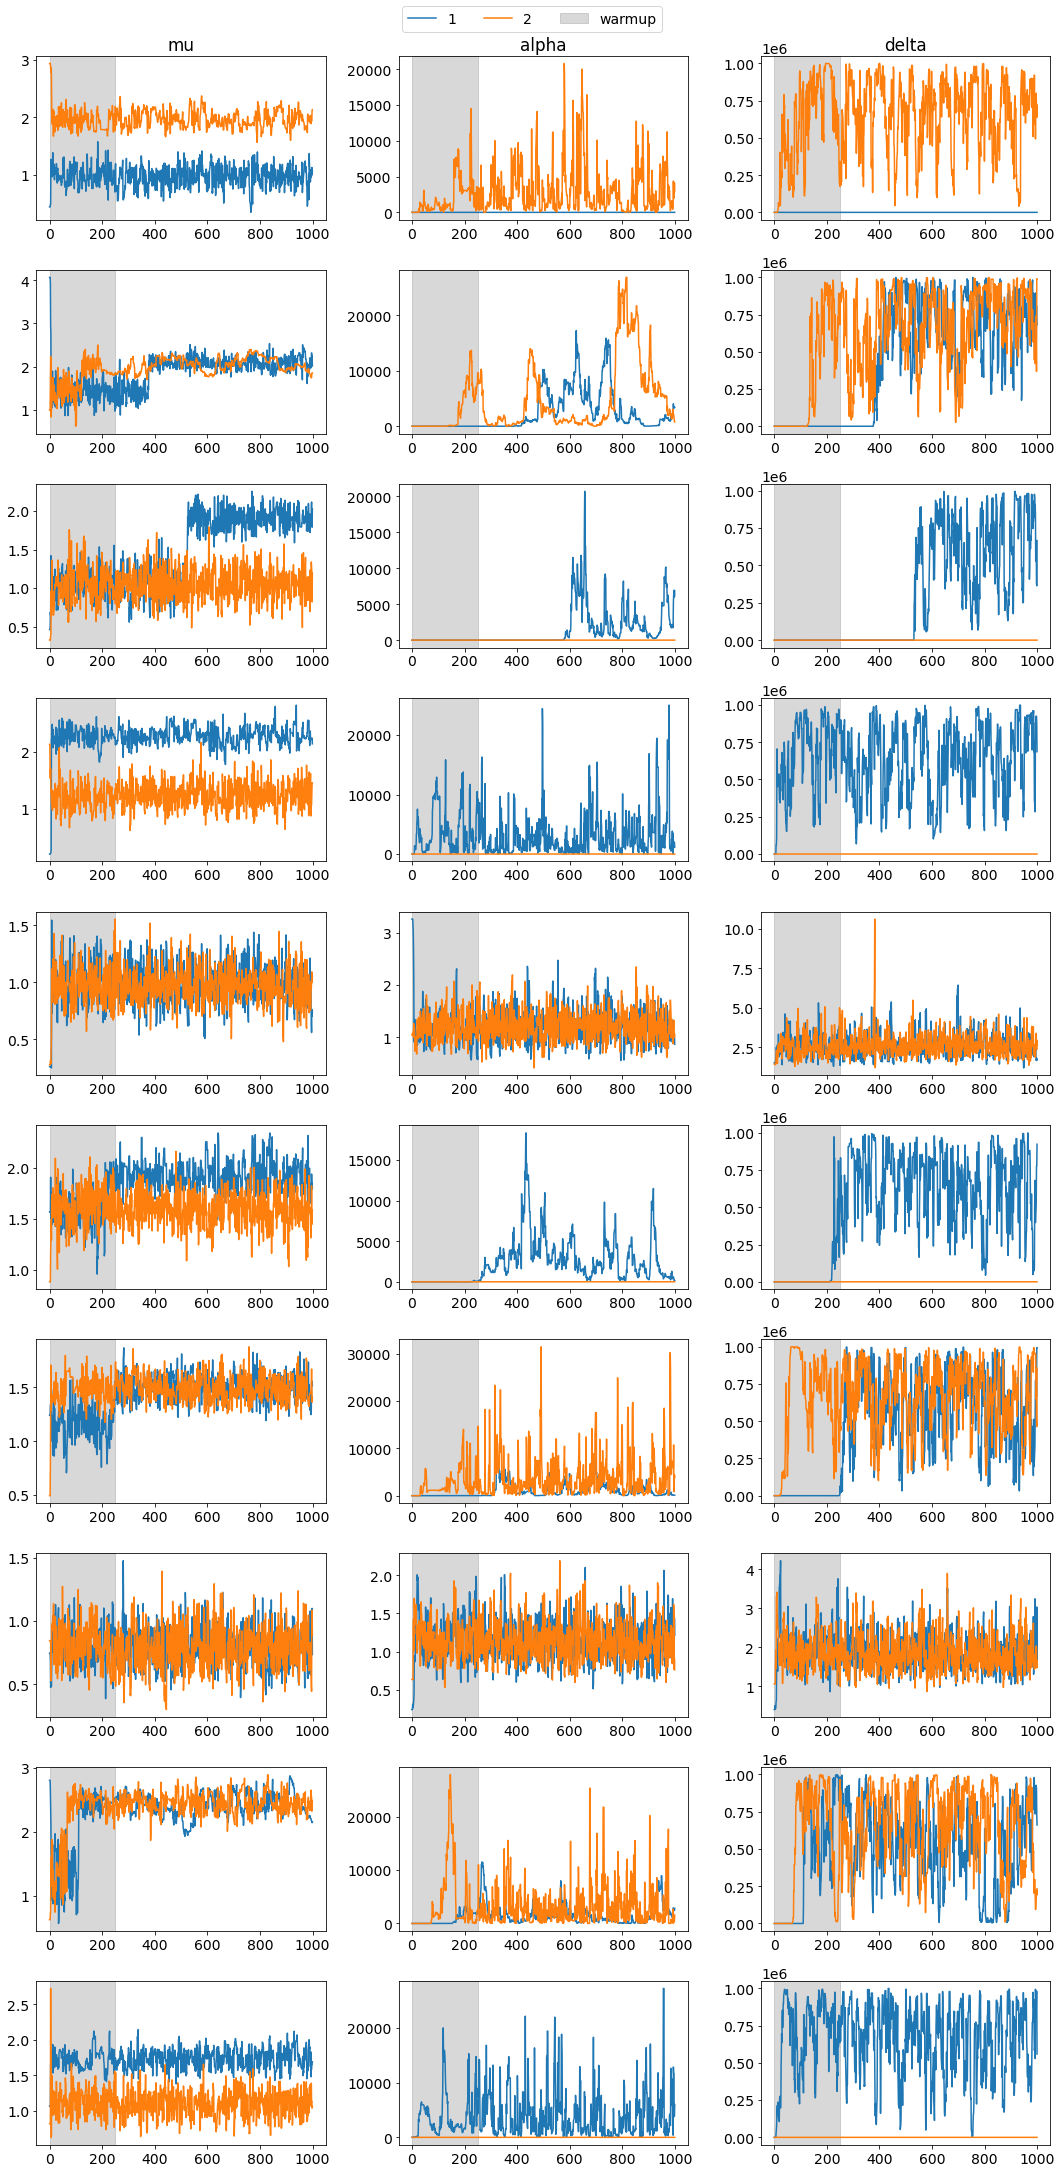

In [71]:
trace_plots(fits, param_strings, warmup=warmup)